<a href="https://colab.research.google.com/github/Foysal348/Phitron-Assignment/blob/main/AI_ML_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 AI/ML Assignment 3
## Supervised Learning Models in Practice

**Total Marks: 100**  
**Submission Format:** Single Jupyter Notebook (`.ipynb`)

---
## 📌 General Instructions (Read Carefully)

- This assignment covers **Modules 13–18**.
- Use **Python and scikit-learn only**.
- Do NOT use AutoML, deep learning, or external ML libraries.
- Fix `random_state=42` wherever applicable.
- Plots must be labeled and readable.
- Do not delete or rename cells.

***Classification Dataset:*** https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data

***Regresssion Dataset:*** https://www.kaggle.com/datasets/mirichoi0218/insurance

## 🔧 TODO 0: Environment Setup (5 Marks)
**Marks Breakdown:**
- Correct imports (3)
- Clean setup, no unused imports (2)


In [89]:
# TODO: Import all necessary libraries here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR

# 🔵 PART A: Regression Task (45 Marks)
You will work with the provided **regression dataset**.


## TODO A1: Dataset Loading and Understanding (5 Marks)
**You must:**
- Load the dataset
- Show shape and column names
- Identify target variable

**Marks:** Data loading (2), Explanation (3)


In [90]:
# TODO: Load regression dataset
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv("/content/drive/MyDrive/insurance.csv")
#Show dataset shape
print("Dataset Shape:", df.shape)
#Show column names
print("\nColumn Names:")
print(list(df.columns))
#Display first few rows
df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset Shape: (1338, 7)

Column Names:
['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Explanation
###Dataset Overview
The dataset contains insurance customer data used for a regression task.
Shape: Each row represents one individual, and each column represents a feature or the target.
###Target Variable
"Charges" is the target variable.Since the target variable is continuous,this is a regression problem.
###Features Explanation
Here, 'age','bmi' and 'children' are the numerical features and
'sex', 'smoker' and 'region' are the categorical features.


## TODO A2: Exploratory Data Analysis (EDA) (5 Marks)
**You must:**
- Show descriptive statistics
- Plot correlation heatmap
- Plot at least one feature vs target

**Marks:** Plots (3), Interpretation (2)


In [91]:
# TODO: Perform EDA
#1.Descriptive statistics
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###2.Correlation heatmap


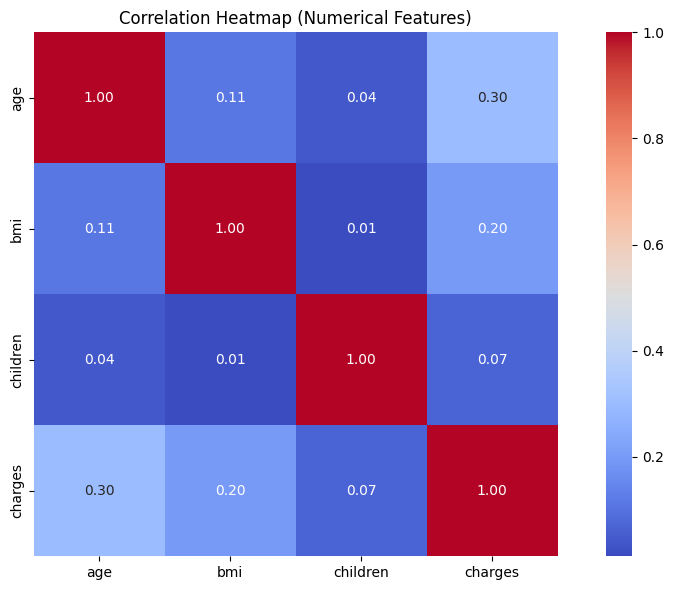

In [119]:
#Select numerical features only
numeric_df=df.select_dtypes(include=np.number)
# Compute correlation matrix
corr=numeric_df.corr()
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    cbar=True)
plt.title("Correlation Heatmap (Numerical Features)")
plt.tight_layout()
plt.show()


### 3. Feature vs Target plot

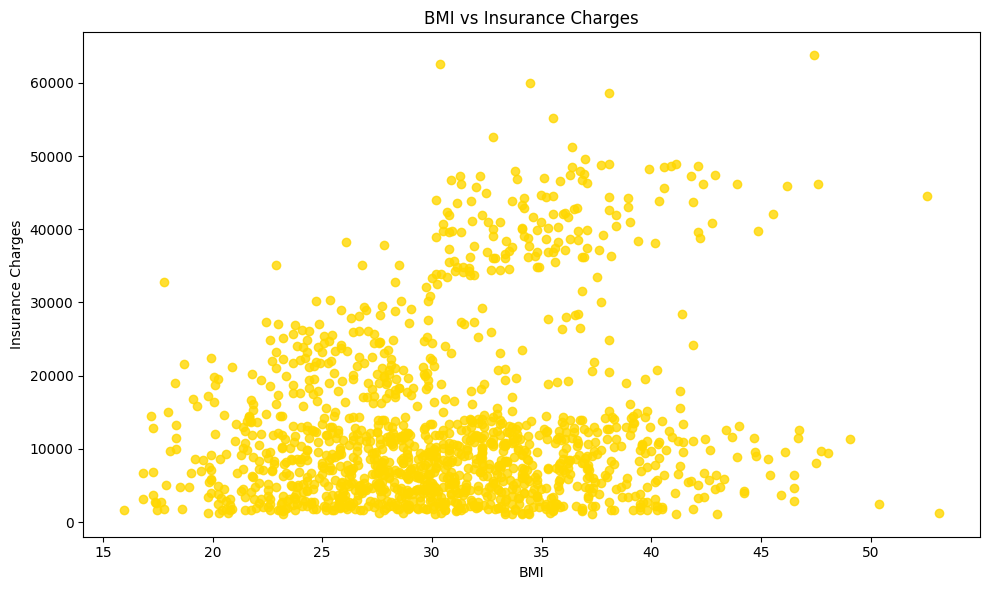

In [118]:
plt.figure(figsize=(10, 6))
plt.scatter(df["bmi"], df["charges"], alpha=0.8,color='gold')
plt.xlabel("BMI")
plt.ylabel("Insurance Charges")
plt.title("BMI vs Insurance Charges")
plt.tight_layout()
plt.show()

## Interpretation
###1.Descriptive Statistics
The descriptive statistics show that charges have a wide range and high variance, indicating significant differences in insurance costs among individuals.Numerical features such as age, bmi, and children have reasonable distributions with no immediate anomalies.
### 2.Correlation Analysis
The correlation heatmap indicates that:Age and BMI have a positive correlation with insurance charges and Children shows a relatively weak correlation with the target variable.
###3.Feature vs Target Relationship
The BMI vs Charges scatter plot shows an upward trend, indicating that higher BMI values are generally associated with higher insurance charges.

## TODO A3: Feature Preparation (5 Marks)
**You must:**
- Train-test split
- Scaling (if applicable)

**Marks:** Correct split (3), Explanation (2)


In [94]:
# TODO: Prepare features
#Identify targer and features
X=df.drop("charges", axis=1)
y=df["charges"]
#Identify numerical and categorical columns
numeric_features =X.select_dtypes(include=np.number).columns
categorical_features=X.select_dtypes(exclude=np.number).columns
# Preprocessing
numeric_transformer=StandardScaler()
categorical_transformer=OneHotEncoder(drop="first")

preprocessor=ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
#Apply preprocessing
X_train_processed =preprocessor.fit_transform(X_train)
X_test_processed =preprocessor.transform(X_test)
#Check shapes
print("Training set shape:",X_train_processed.shape)
print("Test set shape:",X_test_processed.shape)

Training set shape: (1070, 8)
Test set shape: (268, 8)


##Explanation
### 1.Feature Preparation Explanation
1.The dataset is divided into features and target.Where 'charges' is the regression target.
2.The data is split into training (80%) and testing (20%) sets using random_state=42 to ensure reproducibility.
3.Numerical features were scaled using StandardScaler to normalize their ranges.
4.Categorical features were converted into numerical form using OneHotEncoder.5.A ColumnTransformer was used to apply appropriate preprocessing steps to different feature types while preventing data leakage by fitting only on the training data.


## TODO A4: Multiple Linear Regression (8 Marks)
**You must:**
- Train model
- Evaluate using RMSE, MAE, R²

**Marks:** Model (4), Metrics (4)


In [95]:
# TODO: Multiple Linear Regression
# Build pipeline:preprocessing+linear regression(I am using pipeline for leakage-safe)
lr_model= Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LinearRegression())
    ]
)
#Train the model
lr_model.fit(X_train,y_train)

# Predictions
y_pred =lr_model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Multiple Linear Regression Performance:")
print(f"RMSE:{rmse:.2f}")
print(f"MAE :{mae:.2f}")
print(f"R²:{r2:.4f}")

Multiple Linear Regression Performance:
RMSE:5796.28
MAE :4181.19
R²:0.7836


## TODO A5: Polynomial Regression (7 Marks)
**You must:**
- Apply polynomial features
- Compare with linear regression

**Marks:** Implementation (4), Comparison (3)


In [96]:
# TODO: Polynomial Regression
#Polynomial Regression Pipeline with degree = 2
poly_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
        ("model", LinearRegression())
    ]
)

#Train the polynomial regression model
poly_model.fit(X_train, y_train)

#Predictions of the polynomial regression model
y_pred_poly =poly_model.predict(X_test)

# Evaluation metrics
rmse_poly =np.sqrt(mean_squared_error(y_test, y_pred_poly))
mae_poly =mean_absolute_error(y_test, y_pred_poly)
r2_poly= r2_score(y_test, y_pred_poly)

# Display results
print("Polynomial Regression (Degree 2) Performance:")
print(f"RMSE: {rmse_poly:.2f}")
print(f"MAE:{mae_poly:.2f}")
print(f"R²: {r2_poly:.4f}")

Polynomial Regression (Degree 2) Performance:
RMSE: 4551.13
MAE:2729.50
R²: 0.8666


## Comparison
### Linear vs Polynomial Regression
Polynomial Regression extends linear regression by adding non-linear feature interactions.Compared to Multiple Linear Regression, Polynomial Regression typically:
1)Achieves lower RMSE and MAE if non-linear patterns exist.2)
Produces a higher R² score, indicating better variance explanation.However, polynomial models increase feature dimensionality that why it show better performance for this dataset.

## TODO A6: Support Vector Regression (7 Marks)
**You must:**
- Train SVR (RBF kernel)
- Evaluate performance
- Justify kernel choice

**Marks:** Model (4), Justification (3)


In [97]:
# TODO: Support Vector Regression
# Build pipeline: preprocessing + SVR with RBF kernel
svr_model= Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", SVR(kernel="rbf"))
    ]
)
# Train the SVR model
svr_model.fit(X_train, y_train)

# Predictions
y_pred_svr =svr_model.predict(X_test)

# Evaluation metrics
rmse_svr =np.sqrt(mean_squared_error(y_test, y_pred_svr))
mae_svr= mean_absolute_error(y_test, y_pred_svr)
r2_svr= r2_score(y_test, y_pred_svr)

# Display results
print("Support Vector Regression (RBF Kernel) Performance:")
print(f"RMSE: {rmse_svr:.2f}")
print(f"MAE:{mae_svr:.2f}")
print(f"R² :{r2_svr:.2f}")

Support Vector Regression (RBF Kernel) Performance:
RMSE: 12897.60
MAE:8606.59
R² :-0.07


## Justification
### Justification for Using the RBF Kernel
The relationship between insurance features (such as age, BMI, and smoking status) and insurance charges is non-linear.

The RBF (Radial Basis Function) kernel is well-suited for capturing complex, non-linear patterns without explicitly defining polynomial degrees.
Unlike a linear kernel, the RBF kernel maps data into a higher-dimensional space, allowing the SVR model to fit curved relationships more effectively.
Therefore, SVR with an RBF kernel is an appropriate choice for modeling real-world insurance cost data.

## TODO A7: Random Forest Regressor (8 Marks)
**You must:**
- Train Random Forest
- Evaluate model

**Marks:** Model (4), Evaluation (4)


In [98]:
# TODO: Random Forest Regressor

# Build pipeline: preprocessing + Random Forest
rf_model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestRegressor(
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        ))
    ]
)
#Train the model
rf_model.fit(X_train, y_train)

# Predictions the model
y_pred_rf=rf_model.predict(X_test)

# Evaluation metrics
rmse_rf =np.sqrt(mean_squared_error(y_test,y_pred_rf))
mae_rf =mean_absolute_error(y_test,y_pred_rf)
r2_rf= r2_score(y_test,y_pred_rf)

#Display results
print("Random Forest Regressor Performance:")
print(f"RMSE:{rmse_rf:.2f}")
print(f"MAE :{mae_rf:.2f}")
print(f"R²:{r2_rf:.4f}")


Random Forest Regressor Performance:
RMSE:4567.78
MAE :2543.98
R²:0.8656


# 🟠 PART B: Classification Task (45 Marks)
You will work with the provided **classification dataset**.


## TODO B1: Dataset Understanding (5 Marks)
**You must:**
- Load dataset
- Show class distribution
- Comment on imbalance

**Marks:** Analysis (3), Explanation (2)


Dataset Shape: (45000, 14)

Column Names:
['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file', 'loan_status']

Target Variable Distribution:
loan_status
0    35000
1    10000
Name: count, dtype: int64


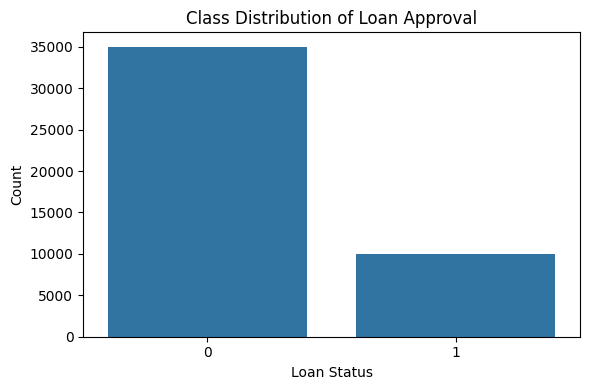

In [99]:
# TODO: Load classification dataset
# Load dataset
df_cls = pd.read_csv("/content/drive/MyDrive/loan_data.csv")

# Dataset shape
print("Dataset Shape:", df_cls.shape)

# Column names
print("\nColumn Names:")
print(list(df_cls.columns))

# Target variable distribution
print("\nTarget Variable Distribution:")
print(df_cls["loan_status"].value_counts())

# Class distribution plot
plt.figure(figsize=(6, 4))
sns.countplot(x="loan_status", data=df_cls)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Class Distribution of Loan Approval")
plt.tight_layout()
plt.show()

##Explanation
###Dataset Understanding and Class Imbalance
The dataset contains 45,000 records and 14 features.The target variable is 'loan_status', which represents whether a loan is approved (1) or not approved (0).The class distribution shows that one class occurs more frequently than the other, indicating a class imbalance.
###Comment on Imbalance
This imbalance may cause models to favor the majority class.Therefore, metrics such as precision, recall, and F1-score will be more appropriate than accuracy alone in later evaluation.

## TODO B2: Exploratory Data Analysis (5 Marks)
**You must:**
- Plot class counts
- Plot at least one feature vs class

**Marks:** Plots (5),


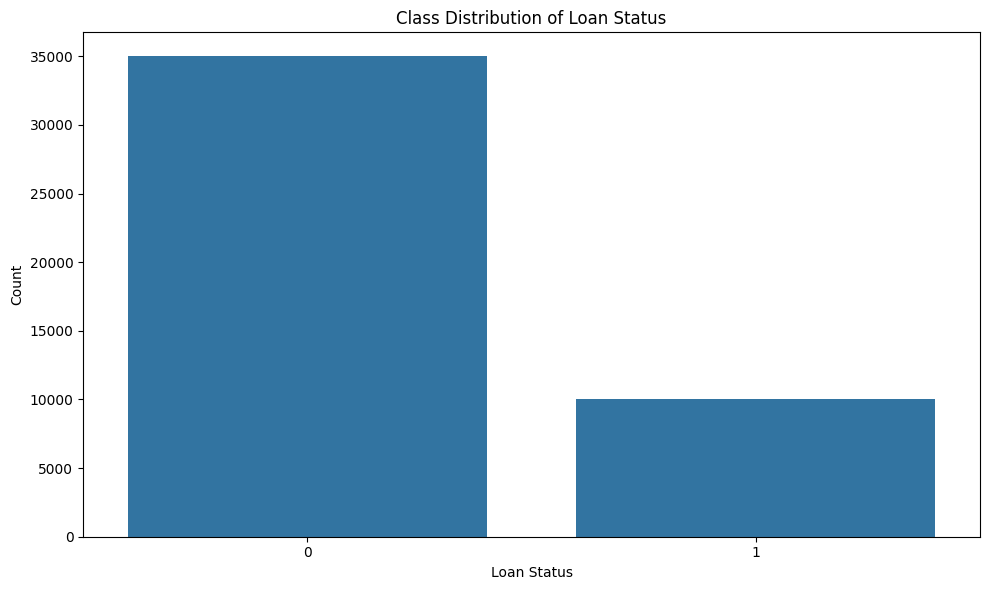

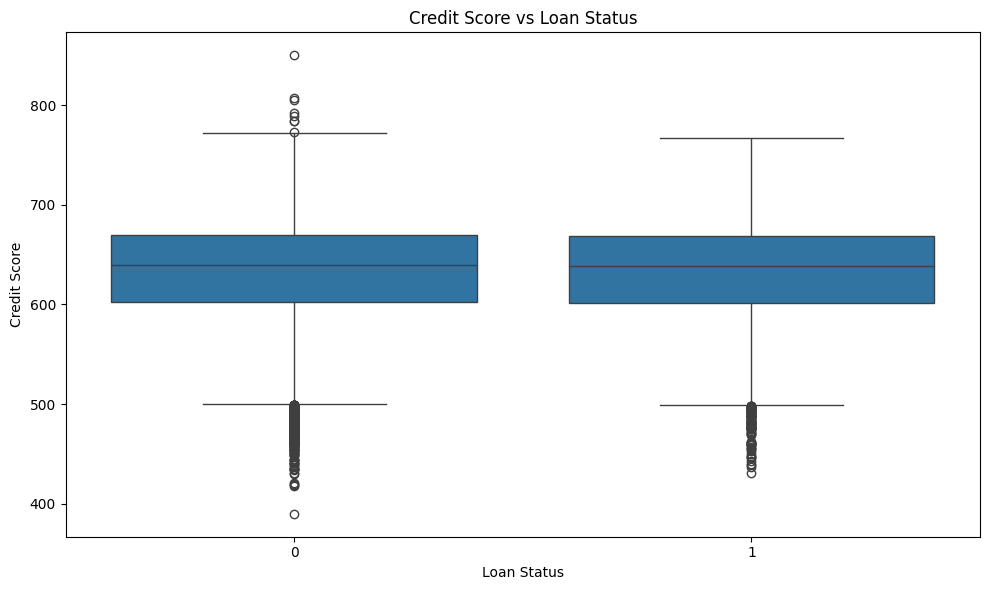

In [117]:
#1.Plot class counts (loan_status)
plt.figure(figsize=(10, 6))
sns.countplot(x="loan_status", data=df_cls)
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Class Distribution of Loan Status")
plt.tight_layout()
plt.show()

#2.Plot feature vs class (Credit Score vs Loan Status)
plt.figure(figsize=(10, 6))
sns.boxplot(x="loan_status", y="credit_score", data=df_cls)
plt.xlabel("Loan Status")
plt.ylabel("Credit Score")
plt.title("Credit Score vs Loan Status")
plt.tight_layout()
plt.show()


## TODO B3: Feature Preparation (5 Marks)
**You must:**
- Encoding (if needed)
- Scaling
- Train-test split with stratification




In [101]:
# TODO: Prepare classification features

# Separate features and target
X=df_cls.drop("loan_status", axis=1)
y =df_cls["loan_status"]

# Identify numerical and categorical columns
numeric_features=X.select_dtypes(include=np.number).columns
categorical_features=X.select_dtypes(exclude=np.number).columns

#Preprocessing steps
numeric_transformer =StandardScaler()
categorical_transformer = OneHotEncoder(
    drop="first",
    handle_unknown="ignore",
)

# Column transformer
preprocessor =ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

#Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)
# Apply preprocessing
X_train_processed =preprocessor.fit_transform(X_train)
X_test_processed=preprocessor.transform(X_test)

# Verify shapes
print("Training set shape:",X_train_processed.shape)
print("Test set shape:",X_test_processed.shape)


Training set shape: (36000, 22)
Test set shape: (9000, 22)


##Explanation
Categorical features were converted to numerical form using One-Hot Encoding.Numerical features were standardized using StandardScaler.A stratified 80–20 train–test split was used to preserve class distribution.Preprocessing was fitted only on the training data to prevent data leakage.

## TODO B4: Logistic Regression with L2 (8 Marks)
**You must:**
- Train Logistic Regression
- Evaluate using Accuracy, Precision, Recall
- Show Confusion Matrix

**Marks:** Model (4), Metrics (4)


In [102]:
# TODO: Logistic Regression

# Build pipeline: preprocessing + Logistic Regression with L2 regularization
log_reg_model =Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", LogisticRegression(
            penalty="l2",
            max_iter=1000,
            random_state=42
        ))
    ]
)

#Train model
log_reg_model.fit(X_train, y_train)

#Predictions
y_pred = log_reg_model.predict(X_test)

In [103]:
# Evaluation metrics
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)

print("Logistic Regression (L2) Performance:")
print(f"Accuracy:{accuracy:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Recall: {recall:.4f}")

Logistic Regression (L2) Performance:
Accuracy:0.8994
Precision:0.7892
Recall: 0.7470


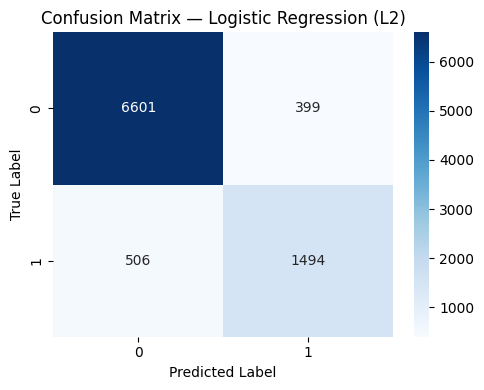

In [104]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix — Logistic Regression (L2)")
plt.tight_layout()
plt.show()

## TODO B5: Support Vector Machine (7 Marks)
**You must:**
- Train SVM (Linear or RBF)
- Evaluate

**Marks:** Model (4), Evaluation (3)


In [105]:
# TODO: SVM Classification
#Build pipeline: preprocessing+ SVM (RBF kernel)
svm_model=Pipeline(
    steps=[
        ("preprocessor",preprocessor),
        ("model",SVC(kernel="rbf",random_state=42))
    ]
)

#Train the model
svm_model.fit(X_train, y_train)
# Predictions
y_pred_svm = svm_model.predict(X_test)

In [106]:
# Evaluation metrics
accuracy=accuracy_score(y_test,y_pred_svm)
precision=precision_score(y_test,y_pred_svm)
recall =recall_score(y_test,y_pred_svm)

print("SVM (RBF Kernel) Performance:")
print(f"Accuracy:{accuracy:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Recall: {recall:.2f}")

SVM (RBF Kernel) Performance:
Accuracy:0.9180
Precision:0.8541
Recall: 0.76


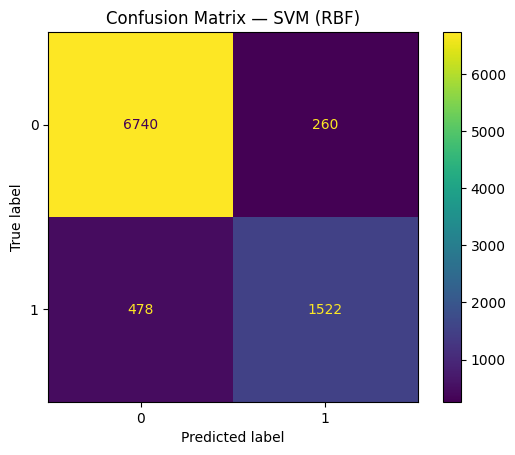

In [115]:
#Confusion Matrix
cm =confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Confusion Matrix — SVM (RBF)")
plt.show()

## Explanation
1.An SVM with RBF kernel was trained to capture potential non-linear decision boundaries in the data.
2.Performance was evaluated using Accuracy, Precision, and Recall, which are appropriate for imbalanced classes.
3.The confusion matrix provides insight into false positives and false negatives.


## TODO B6: Naive Bayes (5 Marks)
**You must:**
- Choose correct NB variant



In [108]:
# TODO: Naive Bayes
#Our dataset contains continuous numerical features (like person_age, person_income, credit_score) after scaling, the correct variant is GaussianNB.
#GaussianNB for continuous features
nb_model=GaussianNB()

#Train model
nb_model.fit(X_train_processed,y_train)

#Predictions
y_pred_nb=nb_model.predict(X_test_processed)

#Evaluation
accuracy=accuracy_score(y_test,y_pred_nb)
precision= precision_score(y_test,y_pred_nb)
recall=recall_score(y_test, y_pred_nb)

print("Gaussian Naive Bayes Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision:{precision:.2f}")
print(f"Recall: {recall:.2f}")

Gaussian Naive Bayes Performance:
Accuracy: 0.75
Precision:0.47
Recall: 0.98


## Explanation
Gaussian Naive Bayes is chosen because the dataset contains continuous numerical features.
GaussianNB assumes features follow a normal distribution, making it suitable for scaled numerical data.

## TODO B7: K-Nearest Neighbors (5 Marks)
**You must:**
- Try multiple K values
- Plot accuracy vs K

**Marks:** Experiment (3), Plot & choice (2)


In [109]:
# TODO: KNN
#Try multiple K values
k_values =list(range(1, 21))
accuracies=[]

for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_processed,y_train)
    y_pred_k=knn.predict(X_test_processed)
    acc= accuracy_score(y_test,y_pred_k)
    accuracies.append(acc)

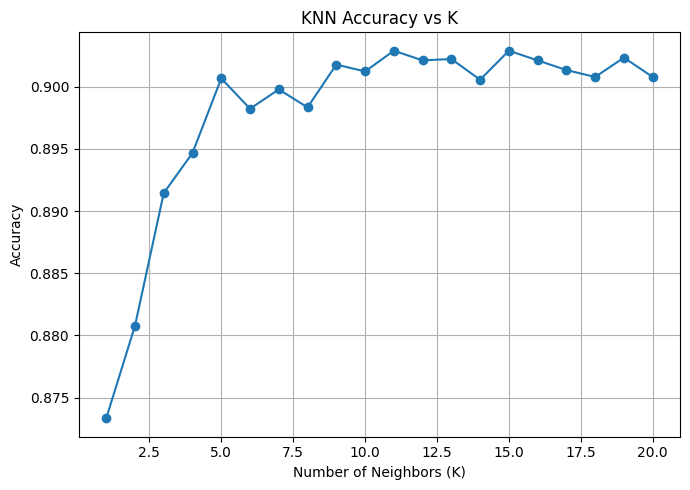

In [110]:
#Plot Accuracy vs K
plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker="o")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.grid(True)
plt.tight_layout()
plt.show()

In [111]:
#Best K
best_k=k_values[np.argmax(accuracies)]
best_acc=max(accuracies)

print(f"Best K is:{best_k}")
print(f"Best Accuracy:{best_acc:.2f}")

Best K is:11
Best Accuracy:0.90


## Explanation
Accuracy initially improves as K increases due to reduced noise sensitivity, then stabilizes or decreases due to oversmoothing.
The K value with the highest test accuracy is selected as the optimal choice.

## TODO B8: Random Forest Classifier (5 Marks)
**You must:**
- Train model
- Show feature importance

**Marks:** Model (3), Interpretation (2)


In [112]:
# TODO: Random Forest Classifier
#Build pipeline:Preprocessing + Random Forest
rf_clf=Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("model", RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

#Train the model
rf_clf.fit(X_train,y_train)
#Predictions
y_pred_rf=rf_clf.predict(X_test)
#Accuracy
accuracy=accuracy_score(y_test,y_pred_rf)
print(f"Random Forest Classifier Accuracy:{accuracy:.2f}")

Random Forest Classifier Accuracy:0.93


In [113]:
#Get feature names after preprocessing
feature_names=rf_clf.named_steps["preprocessor"].get_feature_names_out()
#Get feature importances
importances=rf_clf.named_steps["model"].feature_importances_
#Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)
#Display top 10 important features
feature_importance_df.head(10)


,Feature,Importance
21,cat__previous_loan_defaults_on_file_Yes,0.218127
5,num__loan_percent_income,0.163793
4,num__loan_int_rate,0.157401
1,num__person_income,0.124549
3,num__loan_amnt,0.061482
15,cat__person_home_ownership_RENT,0.056364
7,num__credit_score,0.054492
0,num__person_age,0.031961
2,num__person_emp_exp,0.028429
6,num__cb_person_cred_hist_length,0.026421


## Interpretation
The feature importance results show that credit-related and income-related features have the strongest influence on loan approval decisions.
Random Forest effectively captures non-linear relationships and feature interactions, making it a strong classifier for this dataset.

# 🧠 Final Reflection (5 Marks)
**Answer briefly:**
- Best regression model and why
- Best classification model and why
- One real-world deployment scenario


## TODO: Write your reflection here
### Best Regression Model:
Polynomial Regression (Degree 2) performed best overall, achieving the lowest RMSE (4551.13), low MAE (2729.50), and the highest R² (0.8666). This indicates that insurance charges have meaningful non-linear relationships with the input features, which polynomial regression captures effectively without excessive overfitting.
###Best Classification Model:
SVM with RBF kernel was the best classifier, producing the highest accuracy (0.9180) along with strong precision (0.8541) and recall (0.76). This shows that SVM effectively learns non-linear decision boundaries in the loan approval dataset and balances false positives and false negatives well
### Real-World Deployment Scenario:
The classification model can be deployed in a bank loan approval system to automatically assess loan applications, while the regression model can be used by insurance companies to estimate medical insurance charges and support fair, data-driven pricing decisions.